# QUESTION 2

In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data loading and exploration

In [2]:
# data loading
df = pd.read_csv(r"D:\1.PHUONG-USQ\CSC8003-Machine Learning\Assignment 2\Q2.csv")
df.info()
# dimension of the data
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

(8950, 18)

# Data pre-processing

In [3]:
# count total missing values in each column in the DataFrame
print (df.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [4]:
# Replace missing values in CREDIT_LIMIT column using median 

median1 = df['CREDIT_LIMIT'].median()
df['CREDIT_LIMIT'].fillna(median1, inplace=True)

In [5]:
# Replace missing values in MINIMUM_PAYMENTS column using median 

median2 = df['MINIMUM_PAYMENTS'].median()
df['MINIMUM_PAYMENTS'].fillna(median2, inplace=True)

In [6]:
# Drop unnecessary columns
df.drop(['CUST_ID'], axis = 1, inplace=True)

In [7]:
# Scale and normalise the data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df) 
norm_df = normalize(scaled_df)

# PCA

In [8]:
# Apply PCA on the processed data with 2 principal components
pca2 =PCA(n_components=2)
pca2_df = pca2.fit_transform(norm_df)

In [9]:
# Apply PCA on the processed data with 3 principal components
pca3=PCA(n_components=3)
pca3_df = pca3.fit_transform(norm_df)

# K-means

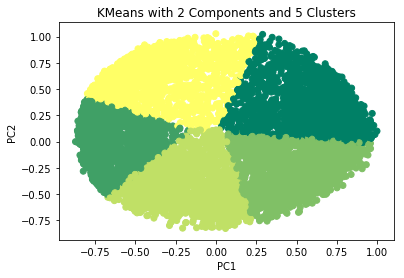

In [10]:
# K-Means with 2 principal components and 5 clusters

model1 = KMeans(n_clusters= 5, random_state=42)
model1.fit(pca2_df)

plt.scatter(pca2_df[:,0], pca2_df[:,1],
            c = model1.fit_predict(pca2_df),
            cmap = plt.cm.summer)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title('KMeans with 2 Components and 5 Clusters')
plt.show() 

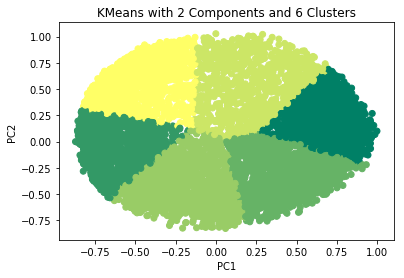

In [11]:
# K-Means with 2 principal components and 6 clusters

model2 = KMeans(n_clusters= 6, random_state=42)
model2.fit(pca2_df)

plt.scatter(pca2_df[:,0], pca2_df[:,1],
            c = model2.fit_predict(pca2_df),
            cmap = plt.cm.summer)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title('KMeans with 2 Components and 6 Clusters')
plt.show() 

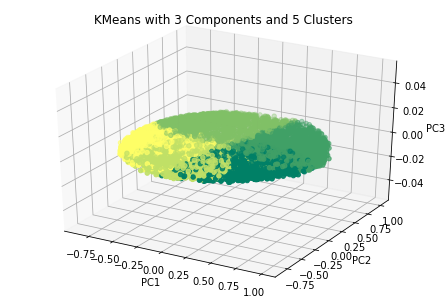

In [12]:
# K-Means with 3 principal components and 5 clusters

model3 = KMeans(n_clusters= 5, random_state=42)
model3.fit(pca3_df)

fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(pca3_df[:,0], pca3_df[:,1],
            c = model3.fit_predict(pca3_df),
            cmap = plt.cm.summer)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title('KMeans with 3 Components and 5 Clusters')
plt.show() 

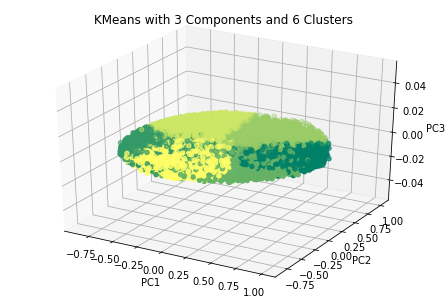

In [13]:
# K-Means with 3 principal components and 6 clusters

model4 = KMeans(n_clusters= 6, random_state=42)
model4.fit(pca3_df)

fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(pca3_df[:,0], pca3_df[:,1],
            c = model4.fit_predict(pca3_df),
            cmap = plt.cm.summer)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title('KMeans with 3 Components and 6 Clusters')
plt.show() 